In [82]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x1, x2):
    return ((10 * x1 ** 2 + x2 ** 2) / 2 )+ (5 * np.log(1 + np.exp(-x1 - x2)))


def gradient(x1, x2):
    e_neg_x = math.exp(-x1 - x2)
    df_dx1 = 10 * x1 - 5 * e_neg_x / (1 + e_neg_x)
    df_dx2 = x2 - 5 * e_neg_x / (1 + e_neg_x)
    return np.array([df_dx1, df_dx2])


def hessian(x1, x2):
    e_neg_x = math.exp(-x1 - x2)
    d2f_dx1_2 = 10 + 5 * e_neg_x / (1 + e_neg_x) ** 2
    d2f_dx1_dx2 = 5 * e_neg_x / (1 + e_neg_x) ** 2
    d2f_dx2_2 = 1 + 5 * e_neg_x / (1 + e_neg_x) ** 2
    return np.array([[d2f_dx1_2, d2f_dx1_dx2], [d2f_dx1_dx2, d2f_dx2_2]])


def gradient_descent(x_init, learning_rate, max_iterations, tol=1e-6):
    x = x_init
    for i in range(max_iterations):
        grad = gradient(*x)
        U= x- learning_rate * grad
        plt.scatter(*U, marker='o', color='r', label='Gradient descent')
        if np.linalg.norm(grad) < tol:
            break
        x = x- learning_rate * grad
    return x, f(*x), i


def newtons_method(x_init, max_iterations, tol=1e-6):
    x = x_init
    for i in range(max_iterations):
        grad = gradient(*x)
        
        hess = hessian(*x)
        U = x- np.linalg.solve(hess, grad)
        plt.scatter(*U, marker='x', color='g', label="Newton's method")
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian(*x)
        x = x- np.linalg.solve(hess, grad)
    return x, f(*x), i

Gradient Descent: x = [0.11246724 1.12467131], f(x) = 1.9697255746727012, iterations = 74
Newton's Method: x = [0.11246719 1.12467185], f(x) = 1.9697255746724396, iterations = 3


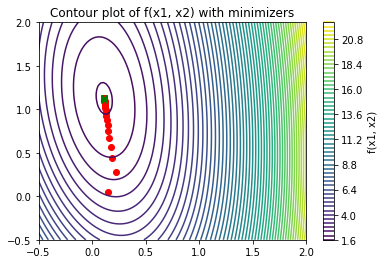

In [85]:
    #Contour properties 
    x1_range = np.linspace(-0.5, 2, 100)
    x2_range = np.linspace(-0.5, 2, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    F = f(X1, X2)
    plt.contour(X1, X2, F, levels=50)
    plt.title('Contour plot of f(x1, x2) with minimizers')
    plt.colorbar(label='f(x1, x2)')
    
    # Initial point and learning rate.
    x_init = np.array([1, -0.1])
    learning_rate = 0.1
    max_iterations = 1000

    x_gd, f_gd, num_iterations_gd = gradient_descent(x_init, learning_rate, max_iterations)
    x_newton, f_newton, num_iterations_newton = newtons_method(x_init, max_iterations)

    print(f"Gradient Descent: x = {x_gd}, f(x) = {f_gd}, iterations = {num_iterations_gd}")
    print(f"Newton's Method: x = {x_newton}, f(x) = {f_newton}, iterations = {num_iterations_newton}")